In [41]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error as mse 
from plotData import *
from linearRegCostFunction import *
from trainLinearReg import *
from learningCurve import *
from polyFeatures import *
from featureNormalize import *
from plotFit import *
from validationCurve import *

In [2]:
data=loadmat('water-level.mat')
X,y,Xval,yval,Xtest,ytest=data['X'],data['y'],data['Xval'],data['yval'],data['Xtest'],data['ytest']
m=X.shape[0]

# Visualize data

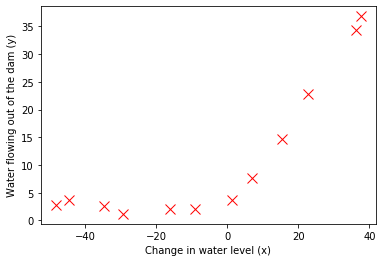

In [3]:
# Plot training data
plotData(X,y,'rx',markersize=10,linewidth=1.5)

# Regularized linear regression

## Learning

In [4]:
theta=np.array([1,1])
J,grad=linearRegCostFunction(np.hstack((np.ones((m,1)),X)),y,theta,1)
print('Cost at theta = [1 ; 1]: %f'%J)
print('Gradient at theta = [1 ; 1]:  [%f; %f]'%(grad[0],grad[1]))

Cost at theta = [1 ; 1]: 303.993192
Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744]


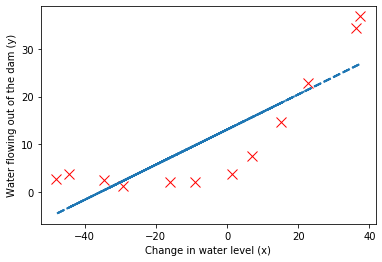

In [5]:
# Train linear regression with lambda = 0
Lambda=0
theta=trainLinearReg(np.hstack((np.ones((m,1)),X)),y,Lambda)
# Plot fit over the data
plotData(X,y,'rx',markersize=10,linewidth=1.5)
plotData(X,np.hstack((np.ones((m,1)),X))@theta,'--',linewidth=2)

## Bias-variance tradeoff: learning curves

Text(0.5, 1.0, 'Learning curve for linear regression')

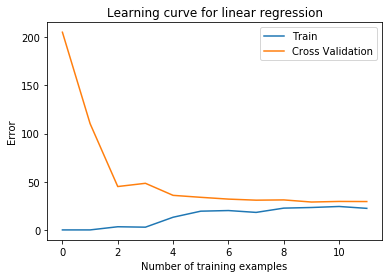

In [6]:
Lambda=0
error_train,error_val=learningCurve(np.hstack((np.ones((m,1)),X)),y,np.hstack((np.ones((Xval.shape[0],1)),Xval)),yval,Lambda)
plotLearningCurve(m,error_train,error_val)
plt.title('Learning curve for linear regression')

In [7]:
def printErrors(n_it,error_train,error_val):
    print('# Training Examples\tTrain Error\tCross Validation Error')
    for i in range(n_it):
        print('\t%d\t\t%f\t%f'%(i,error_train[i],error_val[i]))

In [8]:
printErrors(m,error_train,error_val)

# Training Examples	Train Error	Cross Validation Error
	0		0.000000	205.121096
	1		0.000000	110.300366
	2		3.286595	45.010232
	3		2.842678	48.368911
	4		13.154049	35.865141
	5		19.443963	33.829957
	6		20.098522	31.970987
	7		18.172859	30.862446
	8		22.609405	31.135998
	9		23.261462	28.936207
	10		24.317250	29.551432
	11		22.373906	29.433818


# Polynomial linear regression

## Feature mapping 

In [9]:
p=8
# Map X onto Polynomial Features and Normalize
X_poly,mu,sigma=polyFeatureNormalize(X,p)
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test,_,_=polyFeatureNormalize(Xtest,p,mu=mu,sigma=sigma)
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val,_,_=polyFeatureNormalize(Xval,p,mu=mu,sigma=sigma)
print('Normalized Training Example 1: \n',X_poly[0,:])

Normalized Training Example 1: 
 [ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


## Learning

(-23.812653870073596, 61.8238657125424)

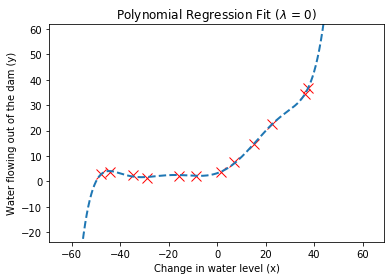

In [10]:
Lambda=0
theta=trainLinearReg(X_poly,y,Lambda)
# Plot training data and fit
plotData(X,y,'rx',markersize=10,linewidth=1.5)
plotFit(X,y,mu,sigma,theta,p)
plt.gca().set_title('Polynomial Regression Fit ($\lambda$ = %.0f)'%Lambda)
y_min,y_max,y_sigma=np.min(y),np.max(y),np.std(y)
plt.ylim(bottom=y_min-2*y_sigma,top=y_max+2*y_sigma)

## Learning curves

# Training Examples	Train Error	Cross Validation Error
	0		0.000000	161.442168
	1		0.000000	160.792292
	2		0.000000	67.084922
	3		0.000000	67.726849
	4		0.000000	6.616987
	5		0.000000	10.642732
	6		0.000000	27.990099
	7		0.035624	9.450759
	8		0.040606	14.392516
	9		0.036856	26.631662
	10		0.038597	22.832476
	11		0.062732	29.334280


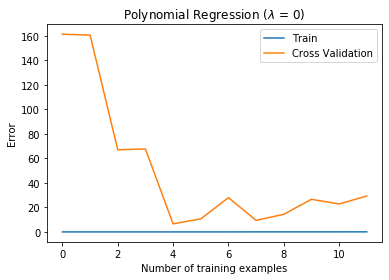

In [11]:
error_train,error_val=learningCurve(X_poly,y,X_poly_val,yval,Lambda)
plotLearningCurve(m,error_train,error_val)
plt.gca().set_title('Polynomial Regression ($\lambda$ = %.0f)'%Lambda)
printErrors(m,error_train,error_val)

Text(0, 0.5, 'Error')

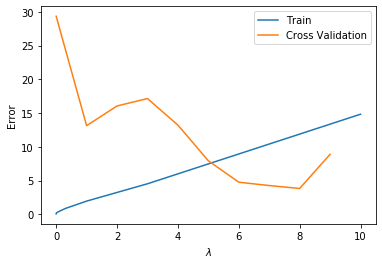

In [14]:
lambda_vec,error_train,error_val=validationCurve(X_poly,y,X_poly_val,yval)
plt.plot(lambda_vec,error_train,error_val)
plt.legend(('Train', 'Cross Validation'))
plt.xlabel('$\lambda$')
plt.ylabel('Error')

In [15]:
print('lambda\tTrain Error\tCross Validation Error')
for i in range(len(lambda_vec)):
    print('\t%f\t\t%f\t%f'%(lambda_vec[i],error_train[i],error_val[i]))

lambda	Train Error	Cross Validation Error
	0.000000		0.062732	29.334280
	0.001000		0.137005	13.131844
	0.003000		0.167314	16.051437
	0.010000		0.217961	17.143183
	0.030000		0.275158	13.215404
	0.100000		0.438673	7.926805
	0.300000		0.868156	4.760831
	1.000000		1.958695	4.263359
	3.000000		4.525105	3.832176
	10.000000		14.825808	8.889725


# Advanced optimization algorithms

In [48]:
clf=LinearRegression()
X_poly_trainval=np.vstack((X_poly,X_poly_val))
ytrainval=np.vstack((y,yval))
train_sizes,train_scores,test_scores=learning_curve(clf,X_poly_trainval,ytrainval,cv=5,scoring='neg_mean_squared_error')

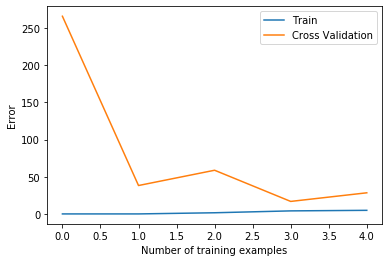

In [49]:
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
plotLearningCurve(len(train_sizes),np.abs(train_scores_mean),np.abs(test_scores_mean))